In [175]:
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [56]:
# creating a timestamp
pd.Timestamp("2023/2/10")

Timestamp('2023-02-10 00:00:00')

In [57]:
# variation
pd.Timestamp("2023-2-10")

Timestamp('2023-02-10 00:00:00')

In [58]:
# only year
pd.Timestamp("2023")

Timestamp('2023-01-01 00:00:00')

In [59]:
# using text
pd.Timestamp("5th sept, 2000")

Timestamp('2000-09-05 00:00:00')

In [60]:
# proveding time also
pd.Timestamp("2023-2-10-12:48 pm")

Timestamp('2023-02-10 12:48:00')

In [61]:
# using datetime.datetime object
t = dt.datetime(2023, 2, 10, 12, 48, 56)
x = pd.Timestamp(t)
x

Timestamp('2023-02-10 12:48:56')

In [62]:
# fetching attributes
x.year

2023

In [63]:
x.month

2

In [64]:
x.day

10

In [65]:
x.day_name()

'Friday'

In [66]:
x.hour

12

In [67]:
x.minute

48

In [68]:
x.second

56

#### Why Separate objects to handle date and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [70]:
date = np.array("2015-07-04", dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [71]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [73]:
# from string 
pd.DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06'])

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[ns]', freq=None)

In [78]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023, 2, 9), dt.datetime(2023, 2, 10)])


DatetimeIndex(['2023-02-09', '2023-02-10'], dtype='datetime64[ns]', freq=None)

In [84]:
# using pd.Timestamp
dt_index = pd.DatetimeIndex([pd.Timestamp("2023-2-9"), pd.Timestamp("2023-2-10"), pd.Timestamp("2023-2-11")])
dt_index

DatetimeIndex(['2023-02-09', '2023-02-10', '2023-02-11'], dtype='datetime64[ns]', freq=None)

In [96]:
# using datetime as series index 
pd.Series([1,2,3],index=dt_index)

2023-02-09    1
2023-02-10    2
2023-02-11    3
dtype: int64

### date_range function

In [105]:
# generate daily dates in given range
pd.date_range(start="2023-02-1", end="2023-02-10", freq="D")

DatetimeIndex(['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10'],
              dtype='datetime64[ns]', freq='D')

In [106]:
# for alternate dates
pd.date_range(start="2023-02-1", end="2023-02-10", freq="2D")

DatetimeIndex(['2023-02-01', '2023-02-03', '2023-02-05', '2023-02-07',
               '2023-02-09'],
              dtype='datetime64[ns]', freq='2D')

In [112]:
# B -> business days
pd.date_range(start="2023-2-1", end="2023-2-15", freq="B")

DatetimeIndex(['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-06',
               '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
               '2023-02-13', '2023-02-14', '2023-02-15'],
              dtype='datetime64[ns]', freq='B')

In [117]:
# W -> one week per day
pd.date_range(start="2023-2-1", end="2023-2-15", freq="W-MON")


DatetimeIndex(['2023-02-06', '2023-02-13'], dtype='datetime64[ns]', freq='W-MON')

In [125]:
# H -> Hourly date(factor)
pd.date_range(start="2023-2-1", end="2023-2-15", freq="2H")

DatetimeIndex(['2023-02-01 00:00:00', '2023-02-01 02:00:00',
               '2023-02-01 04:00:00', '2023-02-01 06:00:00',
               '2023-02-01 08:00:00', '2023-02-01 10:00:00',
               '2023-02-01 12:00:00', '2023-02-01 14:00:00',
               '2023-02-01 16:00:00', '2023-02-01 18:00:00',
               ...
               '2023-02-14 06:00:00', '2023-02-14 08:00:00',
               '2023-02-14 10:00:00', '2023-02-14 12:00:00',
               '2023-02-14 14:00:00', '2023-02-14 16:00:00',
               '2023-02-14 18:00:00', '2023-02-14 20:00:00',
               '2023-02-14 22:00:00', '2023-02-15 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='2H')

In [127]:
# M -> Month end 
pd.date_range(start="2023-1-1",end="2023-3-15",freq="M")

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [128]:
# MS -> Month Start 
pd.date_range(start="2023-1-1",end="2023-3-15",freq="MS")

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq='MS')

In [130]:
# A -> Year end 
pd.date_range(start="2023-1-1",end="2030-3-15",freq="A")

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [133]:
# AS -> Year Start 
pd.date_range(start="2023-1-1",end="2030-3-15",freq="AS")

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [138]:
# using periods (number of results)
pd.date_range(start="2023-2-1", periods=25, freq="W-MON")

DatetimeIndex(['2023-02-06', '2023-02-13', '2023-02-20', '2023-02-27',
               '2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27',
               '2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24',
               '2023-05-01', '2023-05-08', '2023-05-15', '2023-05-22',
               '2023-05-29', '2023-06-05', '2023-06-12', '2023-06-19',
               '2023-06-26', '2023-07-03', '2023-07-10', '2023-07-17',
               '2023-07-24'],
              dtype='datetime64[ns]', freq='W-MON')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [144]:
# simple series example
s = pd.Series(["2023-1-1", "2022-1-1", "2021-1-1"])
s

0    2023-1-1
1    2022-1-1
2    2021-1-1
dtype: object

In [152]:
pd.to_datetime(s)

0   2023-01-01
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [154]:
pd.to_datetime(s).dt.year

0    2023
1    2022
2    2021
dtype: int64

In [155]:
pd.to_datetime(s).dt.month

0    1
1    1
2    1
dtype: int64

In [156]:
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [160]:
# with errors 
s = pd.Series(["2023-1-1", "2022-130-1", "2021-1-1"])
pd.to_datetime(s, errors="coerce")

0   2023-01-01
1          NaT
2   2021-01-01
dtype: datetime64[ns]

In [161]:
pd.to_datetime(s, errors="coerce").dt.year

0    2023.0
1       NaN
2    2021.0
dtype: float64

In [164]:
df = pd.read_csv(r"TheData\expense_data.csv")
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [167]:
df["Date"]= pd.to_datetime(df["Date"])
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [172]:
df["Date"].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int64

In [174]:
df["Date"].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

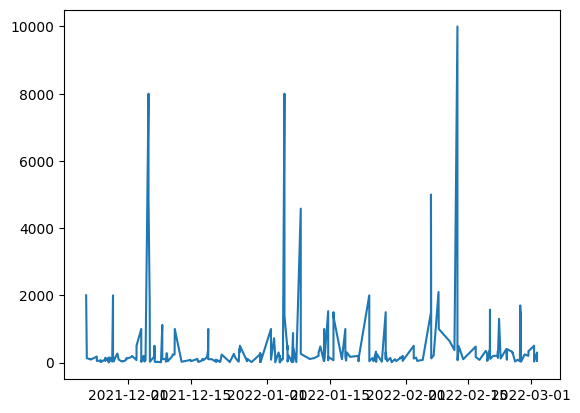

In [178]:
# plot graph
plt.plot(df["Date"], df["INR"])

<AxesSubplot: xlabel='Day'>

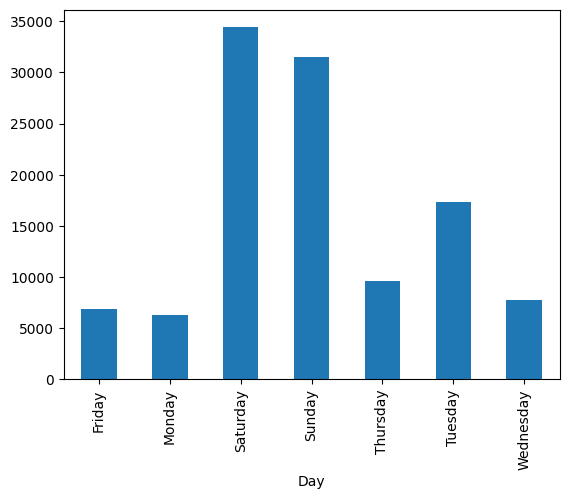

In [188]:
# day name wise bar chart/month wise bar chart
df["Day"] = df["Date"].dt.day_name()
df.groupby("Day")["INR"].sum().plot(kind="bar")

<AxesSubplot: xlabel='Month'>

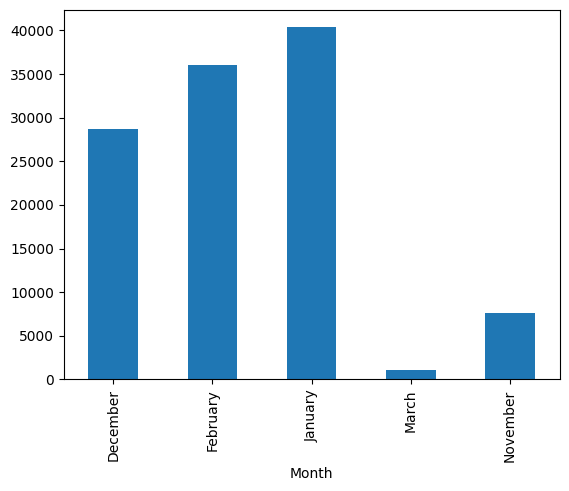

In [189]:
# day name wise bar chart/month wise bar chart
df["Month"] = df["Date"].dt.month_name()
df.groupby("Month")["INR"].sum().plot(kind="bar")

# End